### Test

veryfing working methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

numpy array differentiation & integration

$$f(x) = x^2 + 1$$
$$f'(x) = 2x$$
$$F(x) = \frac{x^3}{3} + x$$

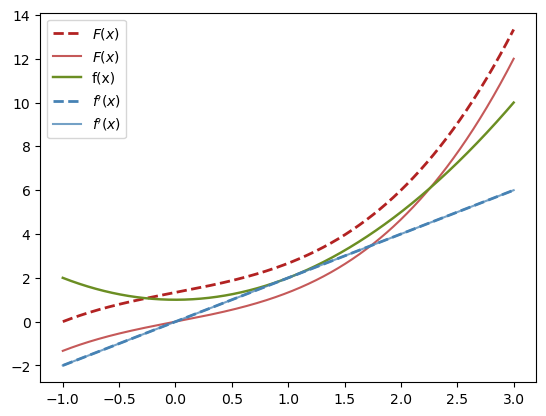

f'(x) always corresponds, F(x) corresponds if lower bound is x = 0, otherwise constant vertical shift


In [2]:
def f_fun(x):
    return x**2 + 1
def ff_fun(x):
    return 2*x
def F_fun(x):
    return x**3 / 3 + x

x = np.linspace(-1, 3, 10**4)

f = f_fun(x)
ff = (f[1:] - f[:-1]) / (x[1:] - x[:-1])
F = np.cumsum(f[1:] * (x[1:] - x[:-1]))

plt.plot(x[1:], F, '--', lw=2, c='firebrick', label=r"$F(x)$")
plt.plot(x, F_fun(x), c='firebrick', alpha=0.75, label=r"$F(x)$")
plt.plot(x, f_fun(x), lw=1.75, label="f(x)", c='olivedrab')
plt.plot(x[1:], ff, '--', c='steelblue', lw=2, label=r"$f'(x)$")
plt.plot(x, ff_fun(x), c='steelblue', alpha=0.75, label=r"$f'(x)$")

plt.legend()

plt.show()
plt.close()

print("f'(x) always corresponds, F(x) corresponds if lower bound is x = 0, otherwise constant vertical shift")

dirac delta integration

$$E_M(t) = \frac{A}{1 + t}$$

$$\frac{dN_p}{dE_p} = \frac{B}{1 + t} \delta(E_p - E_M(t))$$


$$F_{pp \longrightarrow h}(E_h, E_p) = \frac{1}{E_p} \frac{1}{\sigma(E_p)} \frac{d\sigma}{x_E}(E_h, E_p)$$

$$\frac{dN_h}{dE_h} (E_h) = \int_{E_h}^\infty dE_p \frac{dN_p}{dE_p} F_{pp\longrightarrow h}(E_h, E_p)
= \frac{B}{1 + t} F_{pp\longrightarrow h}(E_h, E_M(t)) = \frac{B}{A} \frac{1}{\sigma(E_M(t))} \frac{d\sigma}{x_E}(E_h, E_M(t))$$

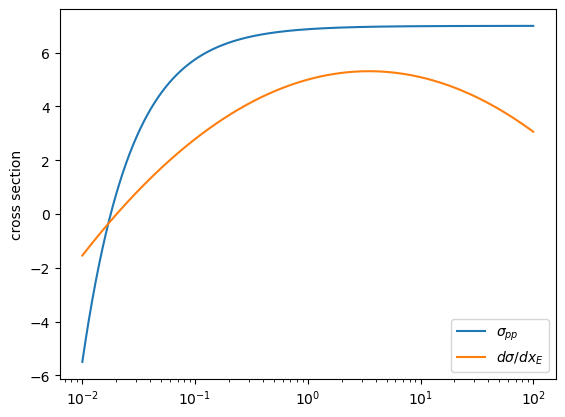

In [3]:
x = np.logspace(-2, 2, 10**4)

def EM(t):
    return 1 / (1 + t)

def sig(E):
    return 7 - 0.125 / E

def dsig(x):
    return 5 + 0.5 * np.log(x) - 0.2 * np.log(x)**2

def dNh(E, t):
    return 1 / sig(EM(t)) * dsig(E / EM(t))

plt.plot(x, sig(x), label=r'$\sigma_{pp}$')
plt.plot(x, dsig(x), label=r'$d\sigma/dx_E$')

plt.legend(loc=4)

plt.xscale('log')
plt.ylabel('cross section')

plt.show()
plt.close()

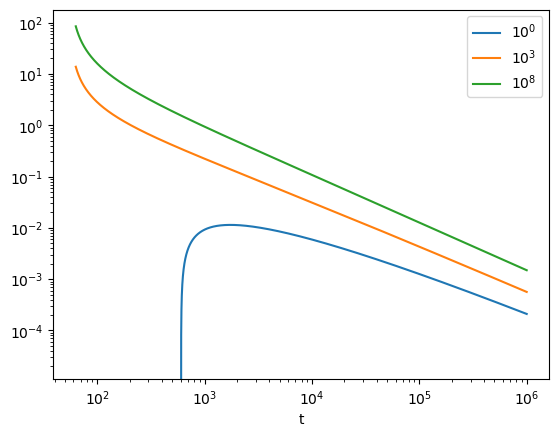

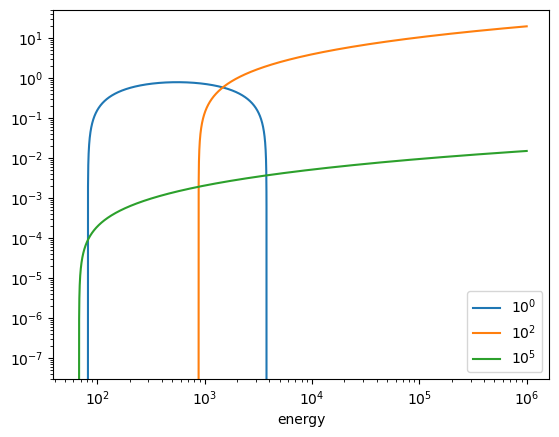

In [4]:
Eh = np.logspace(-2.3, 9, 10**4)
t = np.logspace(1.8, 6, 10**4)

dNh_t1 = dNh(1, t)
dNh_t2 = dNh(1000, t)
dNh_t3 = dNh(100000000, t)

plt.plot(t, dNh_t1, label=r'$10^0$')
plt.plot(t, dNh_t2, label=r'$10^3$')
plt.plot(t, dNh_t3, label=r'$10^8$')

plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.xlabel('t')

plt.show()
plt.close()

dNh_E1 = dNh(Eh, 1)
dNh_E2 = dNh(Eh, 100)
dNh_E3 = dNh(Eh, 100000)

plt.plot(t, dNh_E1, label=r'$10^0$')
plt.plot(t, dNh_E2, label=r'$10^2$')
plt.plot(t, dNh_E3, label=r'$10^5$')

plt.legend()

plt.xscale('log')
plt.yscale('log')
plt.xlabel('energy')

plt.show()
plt.close()

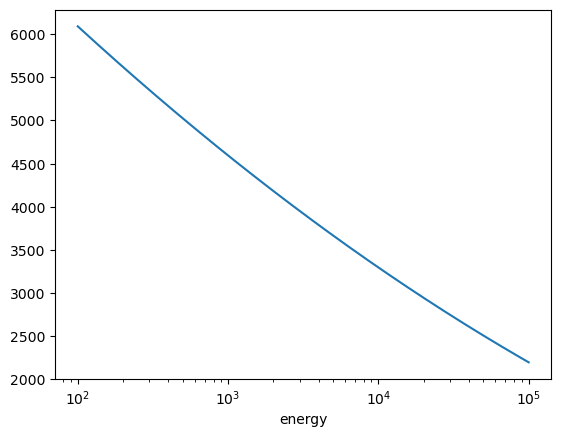

In [5]:
Eh_red = np.logspace(2, 5, 500)

t_int_dNh = np.array([])

for E in Eh_red:
    t_int_dNh = np.append(np.sum(dNh(E, t)[1:] * (t[1:] - t[:-1])), t_int_dNh)

plt.plot(Eh_red, t_int_dNh)

plt.xscale('log')
plt.xlabel('energy')

plt.show()
plt.close()